In [16]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
  
# fetch dataset 
cervical_cancer_risk_factors = fetch_ucirepo(id=383) 
  
# data (as pandas dataframes) 
X = cervical_cancer_risk_factors.data.features 
y = cervical_cancer_risk_factors.data.targets 
  
# metadata 
print(cervical_cancer_risk_factors.metadata) 
  
# variable information 
print(cervical_cancer_risk_factors.variables) 


{'uci_id': 383, 'name': 'Cervical Cancer (Risk Factors)', 'repository_url': 'https://archive.ics.uci.edu/dataset/383/cervical+cancer+risk+factors', 'data_url': 'https://archive.ics.uci.edu/static/public/383/data.csv', 'abstract': 'This dataset focuses on the prediction of indicators/diagnosis of cervical cancer. The features cover demographic information, habits, and historic medical records.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 858, 'num_features': 36, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Other'], 'target_col': None, 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2017, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5Z310', 'creators': ['Kelwin Fernandes', 'Jaime Cardoso', 'Jessica Fernandes'], 'intro_paper': {'title': 'Transfer Learning with Partial Observability Applied to Cervical Cancer Screening', 'autho

In [17]:
y

In [18]:
import pandas as pd

# Ver las primeras filas de las características
print(X.head())

# Verificar la información general del conjunto de datos
print(X.info())

# Estadísticas descriptivas del conjunto de datos
print(X.describe())


   Age  Number of sexual partners  First sexual intercourse  \
0   18                        4.0                      15.0   
1   15                        1.0                      14.0   
2   34                        1.0                       NaN   
3   52                        5.0                      16.0   
4   46                        3.0                      21.0   

   Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
0                 1.0     0.0             0.0                  0.0   
1                 1.0     0.0             0.0                  0.0   
2                 1.0     0.0             0.0                  0.0   
3                 4.0     1.0            37.0                 37.0   
4                 4.0     0.0             0.0                  0.0   

   Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
0                      0.0                              0.0  0.0  ...   
1                      0.0                            

In [19]:
# Verificar si hay valores nulos
print(X.isnull().sum())




Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [20]:
# Llenar valores nulos con la media (como ejemplo)
X.fillna(X.mean(), inplace=True)

In [21]:
# Verificar si hay valores nulos
print(X.isnull().sum())




Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [22]:
# Convertir variables categóricas a variables dummy
X = pd.get_dummies(X, drop_first=True)


In [23]:
X

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0000,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,6.140845,5.816901,0,0,0,0,0,0,0,0
1,15,1.0,14.0000,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,6.140845,5.816901,0,0,0,0,0,0,0,0
2,34,1.0,16.9953,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,6.140845,5.816901,0,0,0,0,0,0,0,0
3,52,5.0,16.0000,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,6.140845,5.816901,1,0,1,0,0,0,0,0
4,46,3.0,21.0000,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,6.140845,5.816901,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,6.140845,5.816901,0,0,0,0,0,0,0,0
854,32,2.0,19.0000,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,6.140845,5.816901,0,0,0,0,0,0,0,0
855,25,2.0,17.0000,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,6.140845,5.816901,0,0,0,0,0,0,1,0
856,33,2.0,24.0000,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,6.140845,5.816901,0,0,0,0,0,0,0,0


# Histograma de Number of sexual partners y first sexual intercourse

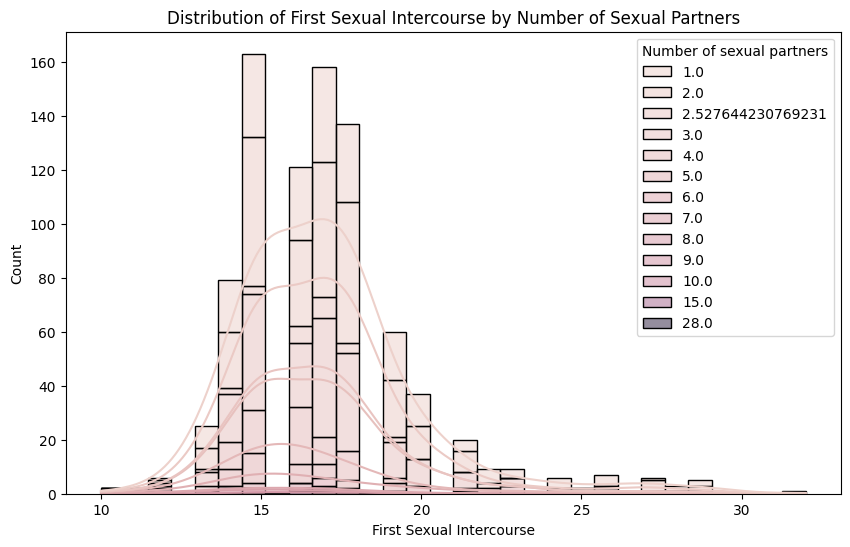

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(data=X, x='First sexual intercourse', hue='Number of sexual partners', multiple="stack", kde=True, bins=30)
plt.title('Distribution of First Sexual Intercourse by Number of Sexual Partners')
plt.xlabel('First Sexual Intercourse')
plt.ylabel('Count')
plt.show()

C:\Users\josea\AppData\Local\Temp\ipykernel_34796\252001422.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_smokes_grouped, x='Age', y='Smokes', palette='viridis')


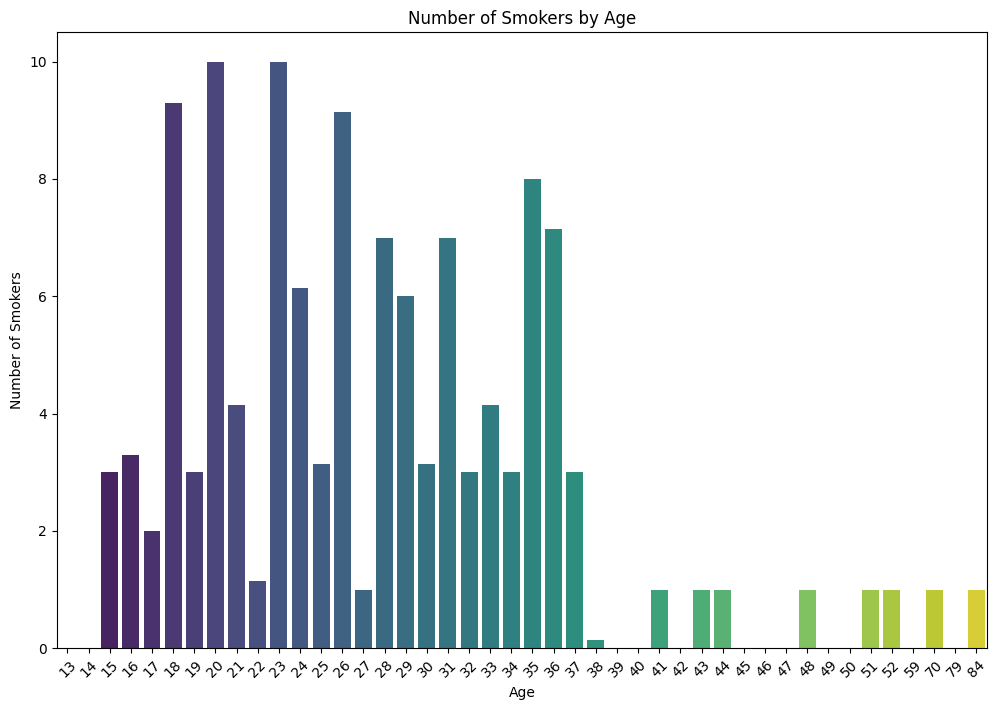

In [35]:

# Crear un DataFrame con edades y si fuman o no
age_smokes = X[['Age', 'Smokes']]

# Agrupar por edad y sumar los fumadores
age_smokes_grouped = age_smokes.groupby('Age')['Smokes'].sum().reset_index()

# Crear el diagrama de barras
plt.figure(figsize=(12, 8))
sns.barplot(data=age_smokes_grouped, x='Age', y='Smokes', palette='viridis')
plt.title('Number of Smokers by Age')
plt.xlabel('Age')
plt.ylabel('Number of Smokers')
plt.xticks(rotation=45)
plt.show()

# Box plot de una característica

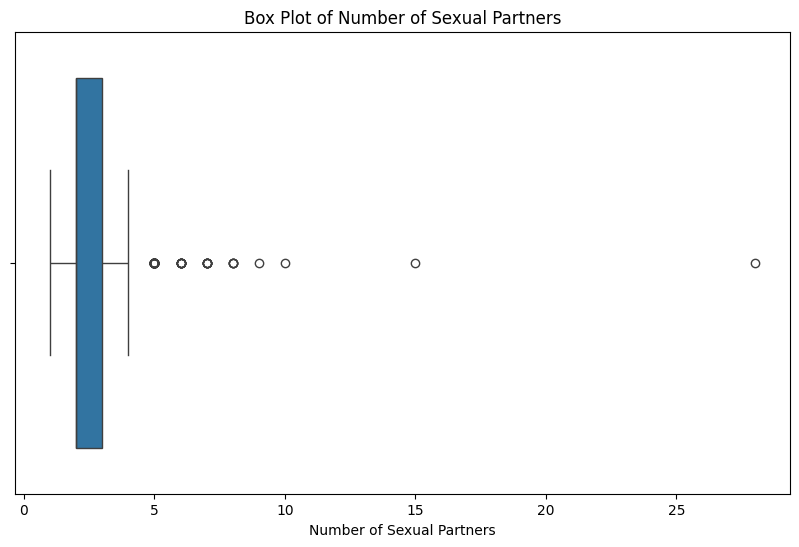

In [27]:

plt.figure(figsize=(10, 6))
sns.boxplot(x=X['Number of sexual partners'])
plt.title('Box Plot of Number of Sexual Partners')
plt.xlabel('Number of Sexual Partners')
plt.show()


# Scatter plot entre dos características

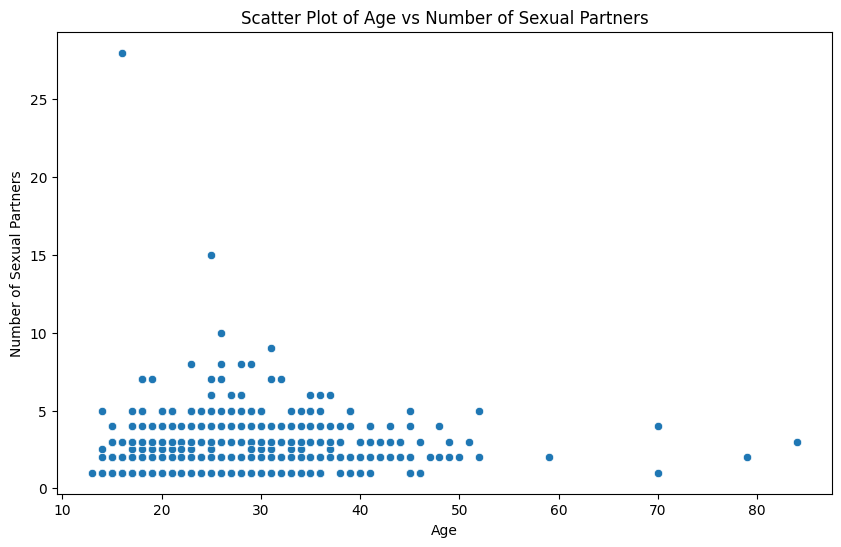

In [28]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['Age'], y=X['Number of sexual partners'])
plt.title('Scatter Plot of Age vs Number of Sexual Partners')
plt.xlabel('Age')
plt.ylabel('Number of Sexual Partners')
plt.show()


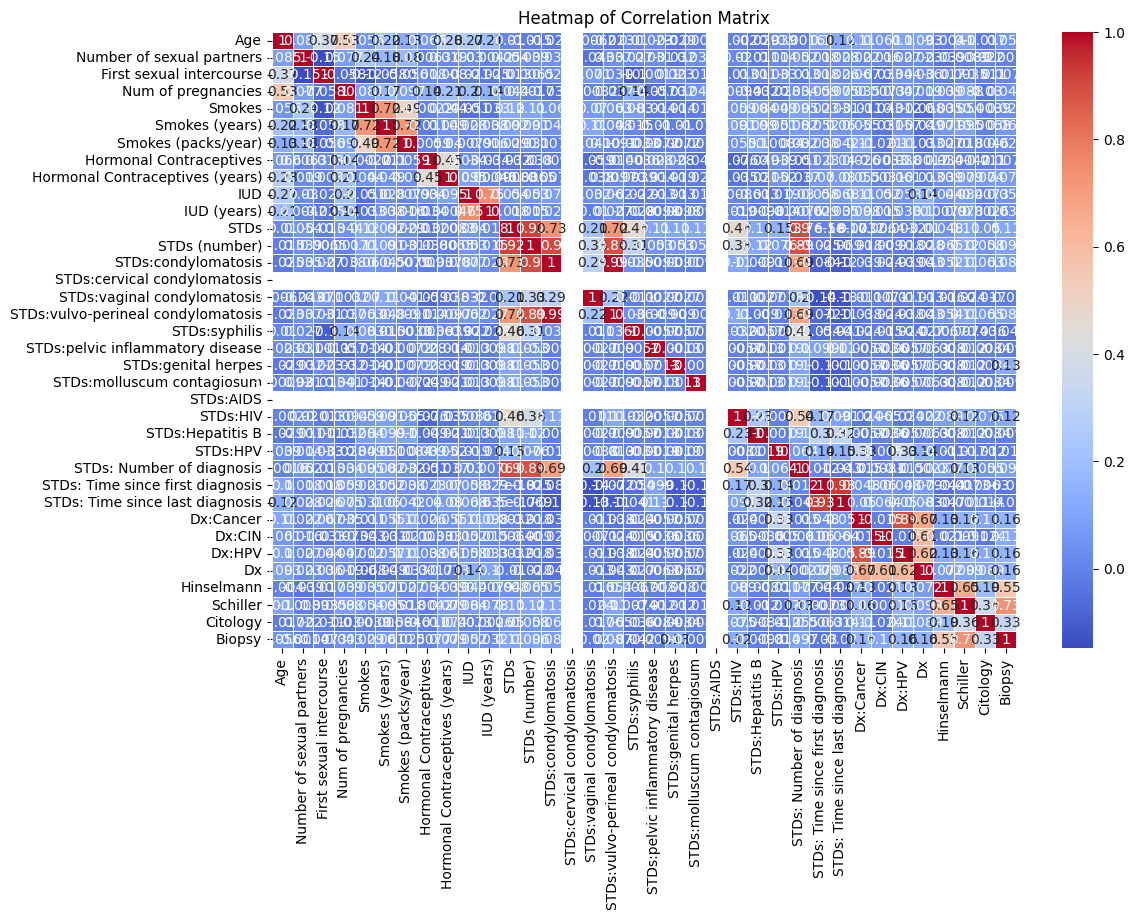

In [29]:
# Matriz de correlación
correlation_matrix = X.corr()

# Heatmap de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()


In [30]:
# Pairplot de todas las características numéricas
sns.pairplot(X)
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()
